# Multi-Objective Optimization

In [37]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import pulp

In [38]:
# Define step-size
stepSize = 0.01

# Initialize empty DataFrame for storing optimization outcomes
solutionTable = pd.DataFrame(columns=["alpha","x1_opt","x2_opt","obj_1", "obj_2", "obj_value"])

In [39]:
# Delcare optimization variables, using PuLP
x1 = pulp.LpVariable("x1", lowBound=0)
x2 = pulp.LpVariable("x2", lowBound=0)


# Iterate through alpha values from 0 to 1 with stepSize, and write PuLP solutions into solutionTable
for i in range(0, 101, int(stepSize*100)):
    # declare the problem again
    linearProblem = pulp.LpProblem(
        "Multi-objective_linear_maximization", pulp.LpMinimize)
    alpha = i/100

    # add the objective function at sampled alpha
    obj_1 = pulp.LpAffineExpression([(x1, 2), (x2, 3)])
    obj_2 = pulp.LpAffineExpression([(x1, 4), (x2, -2)])
    linearProblem += (alpha)*obj_1 + (1-alpha)*obj_2

    # add the constraints
    linearProblem += x1 + x2 <= 10
    linearProblem += 2*x1 + x2 <= 15

    # solve the problem
    solution = linearProblem.solve()

    # write solutions into DataFrame
    solutionTable.loc[int(i/(stepSize*100))] = [i/100,
                                                pulp.value(x1),
                                                pulp.value(x2),
                                                pulp.value(obj_1),
                                                pulp.value(obj_2),
                                                pulp.value(linearProblem.objective)]

In [40]:
solutionTable

,alpha,x1_opt,x2_opt,obj_1,obj_2,obj_value
0,0.00,0.0,10.0,30.0,-20.0,-20.0
1,0.01,0.0,10.0,30.0,-20.0,-19.5
2,0.02,0.0,10.0,30.0,-20.0,-19.0
3,0.03,0.0,10.0,30.0,-20.0,-18.5
4,0.04,0.0,10.0,30.0,-20.0,-18.0
...,...,...,...,...,...,...
96,0.96,0.0,0.0,0.0,0.0,0.0
97,0.97,0.0,0.0,0.0,0.0,0.0
98,0.98,0.0,0.0,0.0,0.0,0.0
99,0.99,0.0,0.0,0.0,0.0,0.0


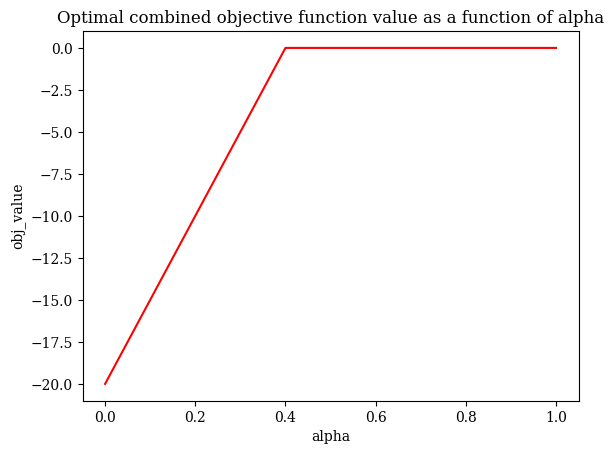

In [48]:
# visualize optimization outcome, using matplotlib.pyplot
plt.plot(solutionTable["alpha"],solutionTable["obj_value"],color="red")
plt.ylabel("obj_value")
plt.xlabel("alpha")
plt.title("Optimal combined objective function value as a function of alpha")
plt.show()

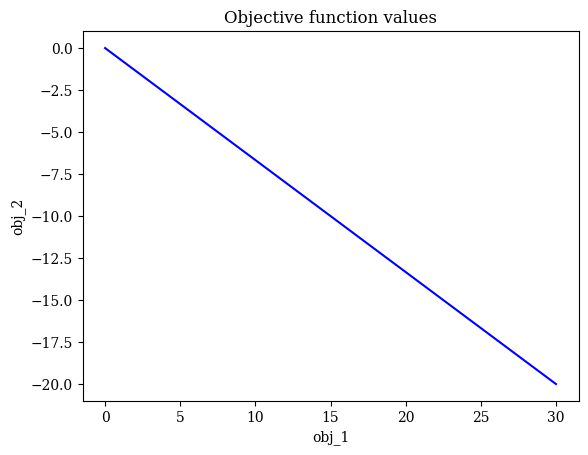

In [54]:
plt.plot(solutionTable["obj_1"],solutionTable["obj_2"],color="blue")
plt.ylabel("obj_2")
plt.xlabel("obj_1")
plt.title("Objective function values")
plt.show()

# PYMOO

In [28]:
import numpy as np
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize 
from pymoo.visualization.scatter import Scatter
from pymoo.core.problem import ElementwiseProblem
from pymoo.problems import get_problem


In [81]:
# Define the problem
class MyProblem(ElementwiseProblem):
    def __init__(self):
        super().__init__(n_var=2,
                         n_obj=2,
                         n_ieq_constr=2,
                         xl=np.array([0, 0]),
                         xu=np.array([10, 10]))

    def _evaluate(self, x, out, *args, **kwargs):
        f1 = 2*x[0] + 3*x[1]
        f2 = 4*x[0] - 2*x[1]
        out["F"] = np.column_stack([np.sin(f1), f2])
        out["G"] = np.column_stack([x[0] + x[1] - 10, 2*x[0] + x[1] - 15])


In [88]:
problem = MyProblem()

# Define the algorithm
algorithm = NSGA2(pop_size=100)

# Define the optimization object
res = minimize(problem,
               algorithm,
               ('n_gen', 100),
               verbose=False,
               seed=1)

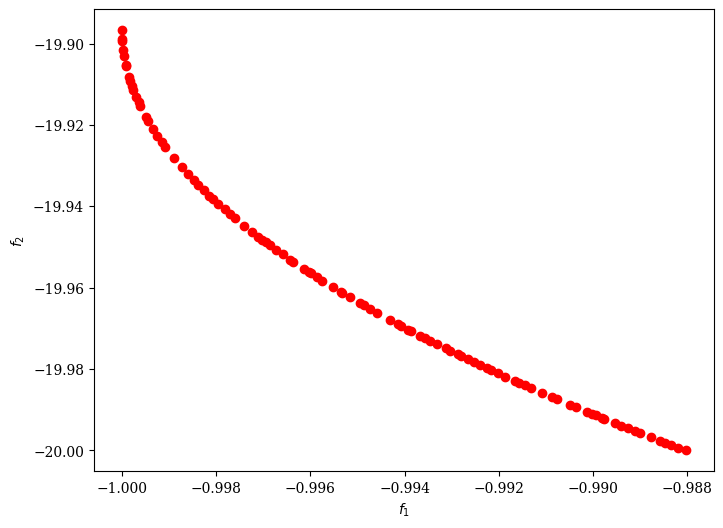

In [89]:
plot = Scatter()
plot.add(res.F, color="red")
plot.show()